### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram
*  LDA over 3 time period windows (~2000, ~2010, ~2020)
*  Dynamic Topic modelling

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [1]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Get the data and check it

In [2]:
unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")

* Take out the nan values

In [3]:
df = unpickled_df[unpickled_df['description'].notna()]
#df

# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [4]:
def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'description'] = column_to_lower(df, 'description')

corpus = df["description"].tolist()

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'facebook’s utilisation of machine learning and artificial intelligence (ai) can often identify profitable targets more quickly and more effectively than can human campaign managers. however, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their facebook ad campaigns and leveraging the power of facebook’s machine learning and ai capabilities. this article discusses the some of the issues that marketers face in trying to fully utilise facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on facebook. this article will detail a few of these frameworks, strategies and tactics. the article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.'

In [6]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

* Create a list all the unique words in the corpus

In [7]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 12319 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

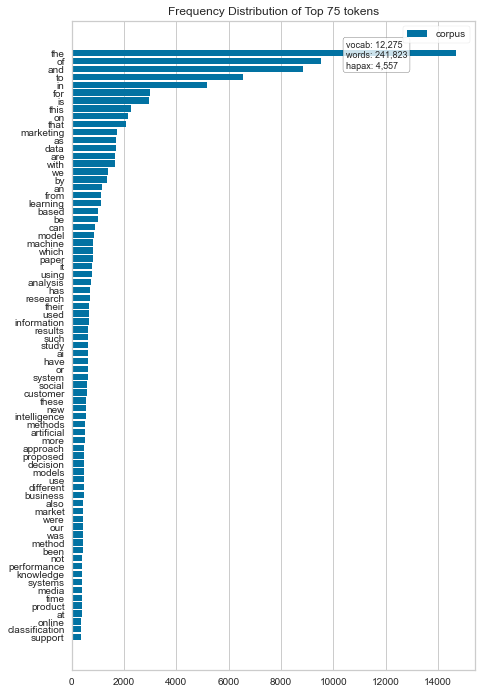

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [8]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

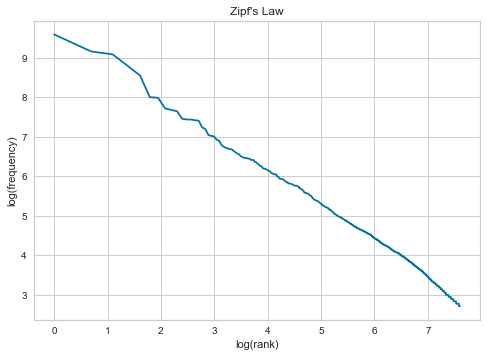

In [9]:
def zipf_law_plot(visualizer_obj, n):
    # Create a Dataframe with 2 columns: the word and the number of times it has been used
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    # Ordering words based on the number of times they have been used and resetting index
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    # Plotting
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000 # The number of words with highest count we include in the plot
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

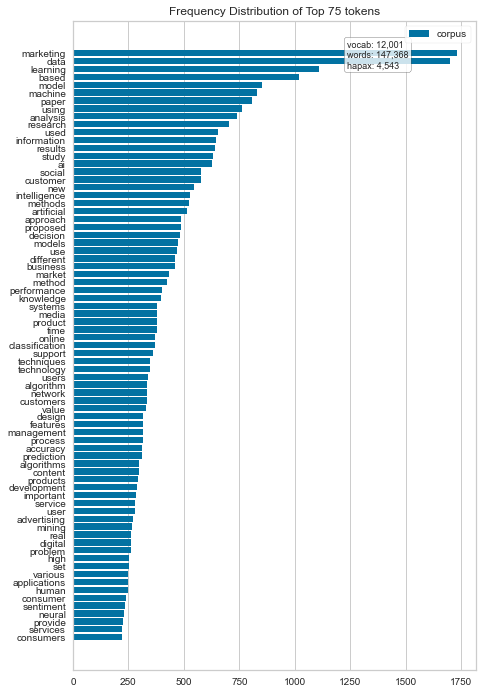

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [10]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

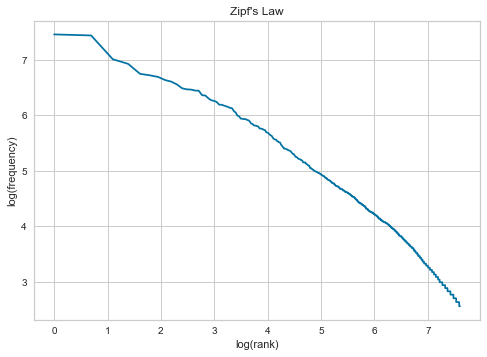

In [11]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [12]:
#from sklearn.feature_extraction import stop_words

* Check the most popular words only for some years

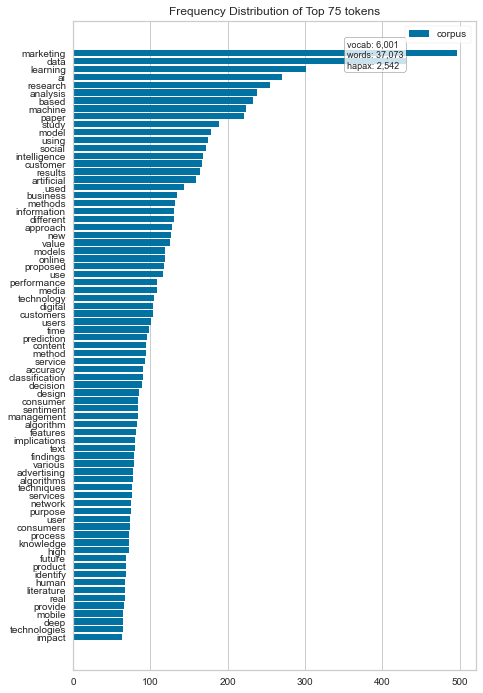

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [13]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus[200:500])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

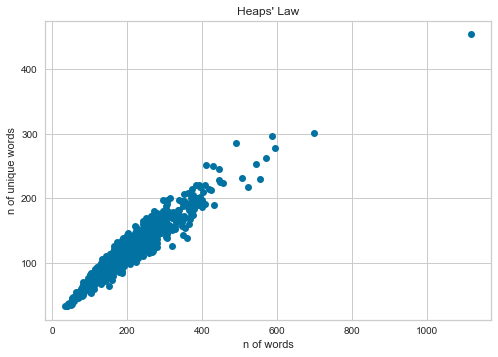

In [14]:
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Lemmatizing & Tokenization

In [15]:
import spacy
spacyen = spacy.load('en_core_web_sm')

In [16]:
from nltk.tokenize import RegexpTokenizer

corpus_mod = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_mod[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_mod]

corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_mod]

### lemmatize() in the cell below does not work correctly

We should add the POS for each word we are using, something like:

```python
lemmatizer.lemmatize(token, pos = 'v')
```
Otherwise it consider all words as if they were nouns and does not correctly tokenize verbs for example

In [17]:
import nltk
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus2 = [[lemmatizer.lemmatize(token) for token in doc] for doc in corpus2]

#corpus_all_lower_lemma

In [18]:
from gensim.models import Phrases
print(corpus2[1])
bigram = Phrases(corpus2, min_count = 20)
for idx in range(len(corpus2)):
    for token in bigram[corpus2[idx]]:
        if "_" in token:
            corpus2[idx].append(str(token))

C:\Users\marco\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['within', 'digital', 'marketing', 'marketing', 'intelligence', 'foster', 'two', 'major', 'development', 'first', 'and', 'even', 'in', 'the', 'absence', 'of', 'key', 'performance', 'indicator', 'it', 'improves', 'marketing', 'efficiency', 'a', 'life', 'cycle', 'marketing', 'automated', 'price', 'adjustment', 'and', 'programmatic', 'advertising', 'based', 'on', 'artificial', 'intelligence', 'ai', 'all', 'support', 'the', 'vision', 'of', 'fully', 'standardised', 'marketing', 'automation', 'with', 'real', 'time', 'optimised', 'customer', 'centricity', 'secondly', 'new', 'marketing', 'area', 'such', 'a', 'viral', 'marketing', 'social', 'medium', 'marketing', 'and', 'content', 'marketing', 'emphasise', 'the', 'increasing', 'significance', 'of', 'creative', 'marketing', 'looking', 'for', 'paradigmatic', 'principle', 'reveals', 'that', 'performance', 'marketing', 'is', 'shaped', 'by', 'analytic', 'processual', 'and', 'lean', 'thinking', 'in', 'contrast', 'creative', 'marketing', 'depends', 'o

In [19]:
print(corpus2[1])

['within', 'digital', 'marketing', 'marketing', 'intelligence', 'foster', 'two', 'major', 'development', 'first', 'and', 'even', 'in', 'the', 'absence', 'of', 'key', 'performance', 'indicator', 'it', 'improves', 'marketing', 'efficiency', 'a', 'life', 'cycle', 'marketing', 'automated', 'price', 'adjustment', 'and', 'programmatic', 'advertising', 'based', 'on', 'artificial', 'intelligence', 'ai', 'all', 'support', 'the', 'vision', 'of', 'fully', 'standardised', 'marketing', 'automation', 'with', 'real', 'time', 'optimised', 'customer', 'centricity', 'secondly', 'new', 'marketing', 'area', 'such', 'a', 'viral', 'marketing', 'social', 'medium', 'marketing', 'and', 'content', 'marketing', 'emphasise', 'the', 'increasing', 'significance', 'of', 'creative', 'marketing', 'looking', 'for', 'paradigmatic', 'principle', 'reveals', 'that', 'performance', 'marketing', 'is', 'shaped', 'by', 'analytic', 'processual', 'and', 'lean', 'thinking', 'in', 'contrast', 'creative', 'marketing', 'depends', 'o

## Divide corpus into sentences

In [20]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

['facebook’s utilisation of machine learning and artificial intelligence (ai) can often identify profitable targets more quickly and more effectively than can human campaign manage',
 'however, there is still much that marketers may do to ensure optimal placement and delivery when it comes to their facebook ad campaigns and leveraging the power of facebook’s machine learning and ai capabiliti',
 'this article discusses the some of the issues that marketers face in trying to fully utilise facebook’s machine-learning capabilities and how many marketers struggle to create campaign structures that allow them to optimise and scale their digital campaigns on facebo',
 'this article will detail a few of these frameworks, strategies and tacti',
 'the article does not advocate the ‘right’ framework to use but rather argues simply that having a framework will ensure better results and support learning throughout the campaign.']

In [21]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

5

In [22]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [23]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\marco\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [24]:
df.nr_sentences_abstract.describe()

count    1282.000000
mean        8.024181
std         3.357940
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        41.000000
Name: nr_sentences_abstract, dtype: float64

In [25]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [26]:
df.loc[df['nr_sentences_abstract'] == 41]['description'].values # Before it was 46, now it seems to be 41... what did we remove?

array(['subject area: pt. bank central asia, tbk. (bca), the largest national private bank in indonesia, won an award for the best bank at the euromoney awards for excellence (asia) 2014. during the same event, in several categories, halobca  and bca employees also won several awards. previously, a number of awards were received by bca such as: best indonesia local private bank in 2010, contact center world champion in 2012 and 2013, and best mega contact center in asia pacific region in 2014. bca is currently facing a problem of an aging population. since the economy crisis facing the country in 1998, bca has recruited fewer employees. the company resumed recruiting in 2010. bca’s human resource (hr) profile in 2013 showed that nearly half of bca’s permanent employees were aged 45 years or older, 40 per cent of whom have been working for more than 20 years. at the time of their retirement, the bank faces the potential of losing a significant number of employees from three different ge

In [27]:
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [28]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

Creativity | Marketing 3.0 | Marketing 4.0 | Marketing intelligence | Paradigm | Performance marketing


In [29]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)
    
print(keywords_all[5000])
print(keywords_paper[50])

Clustering
['marketing authorization holder', 'medical artificial intelligence', 'primary responsibility system']


# (Very) Basic sentiment analysis

In [39]:
from textblob import TextBlob

subjectivity_list = []
for abstr in df.description:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure

# merge it with the dataframe
df["abs_subjectivity"] = subjectivity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))
# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df.citedby_count))

print(df[df["abs_subjectivity"] == max(df["abs_subjectivity"])].description.values)

0.9
0.0
[[1.        0.0080614]
 [0.0080614 1.       ]]
["expert and millwide systems in the latest news on process control from tappi's annual meeting in atlanta, g.a., this article describes the benefits computer technology applications will offer to paper machine performance and paper sales team."]


<ipython-input-39-92b4f4fb625c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["abs_subjectivity"] = subjectivity_list


----

## Word cloud


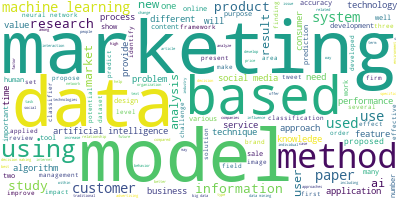

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

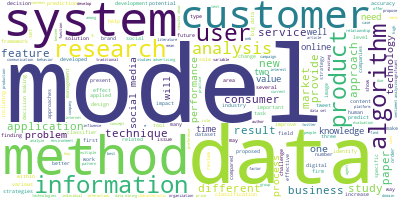

In [32]:
#This is the wordcloud without the keywords

REMOVE_LIST = ["artificial intelligence", "artifical", "intelligence", "machine", "learning", "machine learning",
              "marketing", "deep learning", "deep", "learning", "neural network", "nueral", "network", "AI", "based", "using",
              "used", "use"]

REMOVE_LIST = STOPWORDS.union(REMOVE_LIST)

remove = '|'.join(REMOVE_LIST)
    
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

out1= [regex.sub("", str(x)) for x in df['description']]

#print(out1[1])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

out = ','.join(list(out1))

wordcloud.generate(out)

wordcloud.to_image()

# LDA - unigram

In [33]:
import gensim

from gensim.utils import simple_preprocess

out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in STOPWORDS] for doc in texts]

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        each1 = lemmatizer.lemmatize(data_words[i][j])
        data_words[i][j] = each1

In [34]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

In [35]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [36]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.018*"social" + 0.016*"sentiment" + 0.015*"medium" + 0.014*"user" + 0.012*"analysis" + 0.012*"content" + 0.012*"data" + 0.011*"learning" + 0.010*"twitter" + 0.010*"machine" + 0.010*"tweet" + 0.009*"using" + 0.009*"classification" + 0.008*"method" + 0.008*"marketing" + 0.008*"result" + 0.007*"study" + 0.007*"text" + 0.006*"feature" + 0.006*"accuracy"'), (1, '0.014*"data" + 0.013*"learning" + 0.011*"machine" + 0.009*"classifier" + 0.008*"model" + 0.008*"ensemble" + 0.007*"marketing" + 0.007*"performance" + 0.007*"bca" + 0.006*"svm" + 0.005*"accuracy" + 0.005*"using" + 0.005*"prediction" + 0.005*"classification" + 0.005*"result" + 0.005*"bank" + 0.005*"method" + 0.004*"technique" + 0.004*"approach" + 0.004*"based"'), (2, '0.016*"video" + 0.010*"human" + 0.009*"drug" + 0.008*"food" + 0.007*"emotion" + 0.006*"market" + 0.005*"ad" + 0.005*"machine" + 0.005*"signal" + 0.004*"paper" + 0.004*"music" + 0.004*"target" + 0.004*"device" + 0.004*"job" + 0.004*"product" + 0.004*"scheduling" + 

In [37]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))


1282


## This cell tries interaction term - I am still figuring it out.

In [38]:
df.citedby_count.describe()

df['y']=df.citedby_count>4
#print(df['y'])

df['year'] = df['coverDate'].astype(str).str[0:4]

df['year'] = df['year'].astype(int)

df.loc[df['year'] <2000,'coverDate'] = 0

df.loc[df['year'] > 2010,'coverDate'] = 2

df.loc[(df['year']>=2000) & (df['year'] <= 2010) ,'coverDate'] = 1
#a = np.array(df.coverDate.values.tolist())
#df['coverDate'] = np.where(a < '2000-1-1', 0, a).tolist()
#year

<ipython-input-38-00fdcf44ca3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df.citedby_count>4
<ipython-input-38-00fdcf44ca3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['coverDate'].astype(str).str[0:4]
<ipython-input-38-00fdcf44ca3e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [39]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

X = np.array(train_vecs, df.coverDate)
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

Logistic Regression Val f1: 0.544 +- 0.048
Logisitic Regression SGD Val f1: 0.489 +- 0.091
SVM Huber Val f1: 0.259 +- 0.318


In [40]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321
    





## LDA - bigram

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

num_topics = 20
passes = 20

temp = dictionary2[0]  # This is only to "load" the dictionary.
id2word = dictionary2.id2token

lda_model2 = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                    chunksize = 100, passes = 50, decay = 0.6)


In [ ]:
print(lda_model.print_topics(20, num_words = 20))

## LDA over time

### Firstly, we divide the data in 3 windows (~2000, ~2010 ~2020)

In [ ]:
#~2000

from pprint import pprint

num_topics = 20

inc = df.coverDate == 0
inc.astype(int)

corpus0 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model0 = gensim.models.LdaMulticore(corpus = corpus0, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model0.save('lda_model0.model')

print(lda_model0.print_topics(20, num_words = 15)[:10])

doc_lda0 = lda_model0[corpus0]

train_vecs0 = []
for i in range(len(corpus0)):
    top_topics0 = (
        lda_model0.get_document_topics(corpus0[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec0 = [top_topics0[i][1] for i in range(20)]
    train_vecs0.append(topic_vec0)



In [ ]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')

print(lda_model1.print_topics(20, num_words = 15)[:10])

doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



In [40]:
#~2010

from pprint import pprint

num_topics = 20

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus, inc) if y == 1]

lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50)

lda_model1.save('lda_model1.model')



doc_lda1 = lda_model1[corpus1]

train_vecs1 = []
for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(20)]
    train_vecs1.append(topic_vec1)



In [41]:
'''
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model0, corpus0, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')



SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-41-94d9b67b8bd6>, line 20)

In [ ]:
print(lda_model1.print_topics(20, num_words = 5))